# Matematyczne podstawy modelowania komputerowego

Jakub Spiechowicz

Wyklad 03, Bledy w arytmetyce komputerowej

# Reprezentacja zmiennoprzecinkowa liczb

IEEE 754 (IEEE floating point standard) standard reprezentacji binarnej i arytmetyki zmiennoprzecinkowej opracowany w 1985r.

$$ x = \pm q \times 2^m $$

* 1 bit - znak $\pm$
* 8 bitow - wykladnik $m$ (cecha) zwiekszona o 127, $m \in [1,254]$ 
* 23 bity - mantysa $q$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/IEEE-754-single1.svg/989px-IEEE-754-single1.svg.png" width=100% align='center'>

w sumie 32 bity precyzji = pojedyncza precyzja (7-8 dziesietnych miejsc znaczacych) oraz 

$$\pm 1.18 \cdot 10^{-38} \lesssim x \lesssim \pm 3.4 \cdot 10^{38}$$

# Niedomiar i nadmiar

* Niedomiar $x < 2^{-128}$, zazwyczaj traktowany jako zero
* Nadmiar (nieskonczonosc) $x > 2^{128}$, zalezy od implementacji
* NaN - Not a Number, operacje typu $0/0$, $\infty - \infty$, $x$ + NaN etc.

# Blad, blad bezwzgledny i wzgledny

Blad

$$ \varepsilon = x - x_c $$

Blad bezwzgledny

$$ |\varepsilon| = |x - x_c| $$

Blad wzgledny

$$ \frac{|\varepsilon|}{|x|} = \frac{|x - x_c|}{|x|} $$

# Typy bledow w obliczeniach komputerowych

* Typograficzne
* Przyblizen
* Zaokraglen

# Bledy przyblizen (algorytmiczne)

* Wynikaja z wyboru algorytmu lub jego parametrow

\begin{align}
\sin{x} &= \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} \quad \textrm{(scisle)}\nonumber \\
&\simeq \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x,N) \quad \textrm{(algorytm)}
\end{align}

# Bledy zaokraglen

* Wynikaja ze skonczonej precyzji obliczen komputerowych (analogiczne do niepewnosci pomiarowych w eksperymentach fizycznych)
* Calkowity blad zaokraglenia rosnie wraz z liczba operacji arytmetycznych programu
* Moga byc przyczyna *niestabilnosci* algorytmu

In [5]:
%%python
print '%.21f' % (0.1 + 0.2)

0.300000000000000044409


# Zadanie

Pierwiastkujac liczbe $x$ $M$ razy, a pozniej podnoszac ja $M$ razy do kwadratu powinnismy otrzymac $x$. Zbadaj wynik takiego dzialania na komputerze w zaleznosci od wartosci parametrow $x$ i $M$.

# Odejmowanie bliskich liczb

\begin{align}
x_c &\simeq x(1 + \varepsilon_x) \nonumber \\
a = b - c &\Rightarrow a_c \simeq b_c - c_c \simeq b(1 + \varepsilon_b) - c(1 + \varepsilon_c) \nonumber \\
&\Rightarrow \frac{a_c}{a} \simeq 1 + \frac{b}{a}\varepsilon_b - \frac{c}{a}\varepsilon_c \nonumber \\
\end{align}

Blad $a_c$ jest szczegolnie istotny gdy $b \simeq c$, wtedy

$$\frac{a_c}{a} \equiv 1 + \varepsilon_a \simeq 1 + \frac{b}{a}(\varepsilon_b - \varepsilon_c) \simeq 1 + \frac{b}{a} max(|\varepsilon_b|,|\varepsilon_c|)$$

# Przyklad

$x = 1$, $y = 1 + 10^{-15}\sqrt{2}$

Oczywiscie zachodzi $10^{15}(y-x) = \sqrt{2}$.

In [10]:
%%python
from math import sqrt
x = 1.0
y = 1.0 + (1e-15)*sqrt(2)
sr2 = (10**15)*(y - x)
print sr2, sqrt(2)
print abs(sr2-sqrt(2))/sqrt(2)

1.33226762955 1.41421356237
0.0579445247897


Instrukcja 

$$ y = \sqrt{x^2 + 1} - 1$$

powoduje dla $x \ll 1$ odejmowanie bliskich liczb. Dlatego warto rozwazyc nastepujace przeksztalcenie

$$ y = (\sqrt{x^2 + 1} - 1)\frac{\sqrt{x^2 + 1} + 1}{\sqrt{x^2 + 1} + 1} = \frac{x^2}{\sqrt{x^2 + 1} + 1} $$


# Zadanie

Napisz program, ktory wyznaczy z dokladnoscia do 2 wartosc odpowiadajaca numerycznemu zeru.

# Niestabilnosc numeryczna

Algorytm numeryczny okreslamy jako *niestabilny*, jesli male bledy popelnione w jakims etapie obliczen rosna niekontrolowanie w kolejnych etapach i ostatecznie powaznie znieksztalcaja wynik.

# Przyklad

$$ x_0 = 1, \quad x_1 = \frac{1}{3}, \quad x_{n+1} = \frac{13}{3}x_n - \frac{4}{3}x_{n-1}, \quad (n \geq 1)$$

Zwiazki te generuja ciag o elementach

$$ x_n = \left(\frac{1}{3}\right)^n $$

\begin{align}
x_{m+1} &= \frac{13}{3}x_m - \frac{4}{3}x_{m-1} = \frac{13}{3}\left(\frac{1}{3}\right)^m - \frac{4}{3}\left(\frac{1}{3}\right)^{m-1} \nonumber \\& = \left(\frac{1}{3}\right)^{m-1}\left(\frac{13}{9} - \frac{4}{3}\right) = \left(\frac{1}{3}\right)^{m+1}
\end{align}

In [12]:
%%python
x0 = 1
x1 = 1./3
for i in range(2,21):
    x = (13./3)*x1 - (4./3)*x0
    x0 = x1
    x1 = x
    xt = (1./3)**i
    print i, x, xt, abs(x - xt)/xt

2 0.111111111111 0.111111111111 1.49880108324e-15
3 0.037037037037 0.037037037037 2.079586503e-14
4 0.0123456790123 0.0123456790123 2.56154472633e-13
5 0.00411522633744 0.00411522633745 3.07975520086e-12
6 0.00137174211243 0.00137174211248 3.69654404742e-11
7 0.000457247370625 0.000457247370828 4.43594296061e-10
8 0.000152415789465 0.000152415790276 5.32314044455e-09
9 5.080526018e-05 5.08052634253e-05 6.38776964049e-08
10 1.69350748271e-05 1.69350878084e-05 7.66532366862e-07
11 5.6449773443e-06 5.64502926948e-06 9.1983884106e-06
12 1.88146872247e-06 1.88167642316e-06 0.000110380660937
13 6.26394671637e-07 6.27225474386e-07 0.00132456793126
14 2.05751947133e-07 2.09075158129e-07 0.0158948151751
15 5.63988753916e-08 6.96917193763e-08 0.190737782101
16 -2.99408028131e-08 2.32305731254e-08 2.28885338521
17 -2.04941979379e-07 7.74352437514e-09 27.4662406226
18 -8.48160840225e-07 2.58117479171e-09 329.594887471
19 -3.40210766847e-06 8.60391597238e-10 3955.13864965
20 -1.36115854431e-05 2.86

# Twierdzenie Stone'a-Weierstrassa

Kazda funkcje ciagla o wartosciach rzeczywistych na przedziale domknietym $[a,b]$ mozna przyblizyc jednostajnie z *dowolna* dokladnoscia odpowiednim wielomianem.

# Twierdzenie Taylora (I)

Jezeli $f(x)$ jest n+1 razy rozniczkowalna w sposob ciagly na przedziale domknietym $[a,b]$ to dla kazdego $x$ i $c$ zawartego w $[a,b]$ zachodzi

$$f(x) = \sum_{n=0}^N \frac{f^{(n)}(c)}{n!}(x-c)^n + \varepsilon(x,N,c) $$

# Twierdzenie Taylora (II)

Jezeli $f(x)$ jest n+1 razy rozniczkowalna w sposob ciagly na przedziale domknietym $[a,b]$ to dla kazdego $x$ i $x+h$ zawartego w $[a,b]$ zachodzi

$$f(x+h) = \sum_{n=0}^N \frac{f^{(n)}(x)}{n!}h^n + \varepsilon(x,N,h) $$

# Notacja $O(h^n)$

$$\varepsilon \equiv O(h^n), \quad |\varepsilon| \leq C|h|^n$$

Przyklad

\begin{align}
f(x + h) &= f(x) + f'(x)h + \frac{f''(x)}{2!}h^2 \nonumber \\ &= f(x) + f'(x)h + O(h^2)
\end{align}

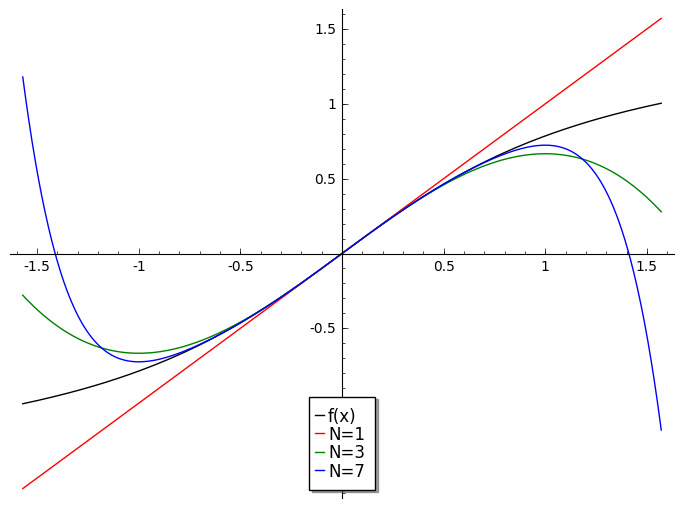

In [4]:
x = var('x')
f(x) = arctan(x)
p=plot(f(x),-pi/2,pi/2, color= 'black', legend_label='f(x)')
g1(x) = f(x).taylor(x, 0, 1)
p1=plot(g1(x),-pi/2,pi/2, color= 'red', legend_label='N=1')
g5(x) = f(x).taylor(x, 0, 3)
p5=plot(g5(x),-pi/2,pi/2, color= 'green', legend_label='N=3')
g7(x) = f(x).taylor(x, 0, 7)
p7=plot(g7(x),-pi/2,pi/2, color= 'blue', legend_label='N=7')
show(p+p1+p5+p7, figsize=7)

# Zadanie

$$ \sin{x} = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} $$

I sposob:

$$ \sin{x} \simeq \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x,N) $$

II sposob:

\begin{align}
\frac{(-1)^{n-1}x^{2n - 1}}{(2n-1)!} &= \frac{-x^2}{(2n-1)(2n-2)}\frac{(-1)^{n-2}x^{2n-3}}{(2n-3)!} \nonumber \\
\Rightarrow \textrm{wyraz }n &= \frac{-x^2}{(2n-1)(2n-2)} \times \textrm{wyraz }n-1
\end{align}